# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [482]:
# Students I discussed the assignment with:
# Courtney Kelly

from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [483]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [2]:
# Your code goes here
auto_numeric.head(8)

NameError: name 'auto_numeric' is not defined

### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [485]:
# Your code goes here
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

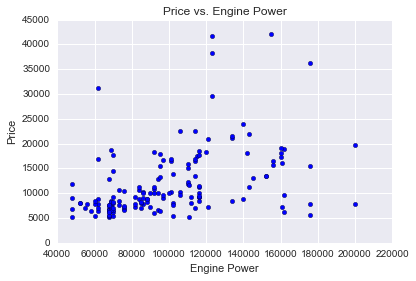

In [486]:
plot = plt.scatter(auto_numeric["engine-power"], auto_numeric["price"])
plt.title('Price vs. Engine Power')
plt.xlabel('Engine Power')
plt.ylabel('Price')

### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 


It seems that engine power does have some very tiny correlation with price, but it is not a strong correlation and ther are numerous outliers so <b>NO</b>, I do not think "that engine-power alone is sufficient for predicting the price." The outliers tend to have really high prices relative to engine power or very high engine power with average or slightly above average prices. It is entirely possible, that these outliers have a reasonable explation and can be explained by a different variable.


### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

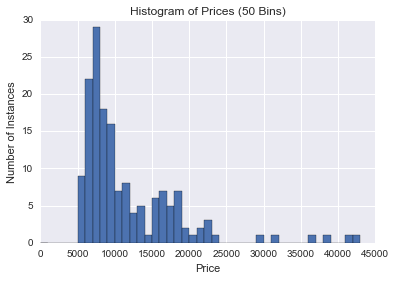

In [487]:
price_data = auto_numeric["price"]
bin_width = 1000
car_price_histogram = plt.hist(price_data, bins=range(int(0), int(max(price_data)) + bin_width, bin_width))
plt.title('Histogram of Prices (50 Bins)')
plt.xlabel('Price')
plt.ylabel('Number of Instances')

### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

I would use a logarithmic transform to allow us to see nuanced differences among smaller prices while still including the large prices without allowing those large prices to have undue influence on the results.



### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [488]:
y = auto_numeric["price"].copy(deep = True)
X = auto_numeric["engine-power"].copy(deep = True)

### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [489]:
n = auto_numeric["price"].count()
X = np.array(X).reshape(n,1)
print("Number of Instances: {}".format(n))
print("X Shape: {}".format(X.shape))

if X.shape[0] == n and X.shape[1] == 1:
    print("Confirmed!")

Number of Instances: 159
X Shape: (159, 1)
Confirmed!


### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [491]:
lm = LinearRegression(fit_intercept = True, normalize = True, copy_X = True)
lm.fit(X_train, y_train)
print('Training accuracy coefficient (R^2): {:.3f}'.format(lm.score(X_train, y_train)))

Training accuracy coefficient (R^2): 0.202


### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [492]:
print("price = ({:.3f} * engine-power) + {:.3f}".format(lm.coef_[0], lm.intercept_))

price = (0.090 * engine-power) + 2823.122


### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

According to our model, one additional unit of engine power leads to an increase in price of approximately .09. But given that engine power tends to change in the many thousands of units rather than just by a single unit, this low number might be a bit misleading. Thus, it is difficult to say whether engine power is a relatively influential variable on price.



### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

In [493]:
# plots data AND fit line
def fit_scatter(X,y, title):
    fig, ax = plt.subplots()
    ax.scatter(X, y, label = 'Data')
    ax.plot(X, lm.predict(X), lw=3, label = 'Regression Line')
    ax.set_xlabel('Engine Power')
    ax.set_ylabel('Price')
    ax.set_title(title)
    ax.legend(loc = 'upper left')

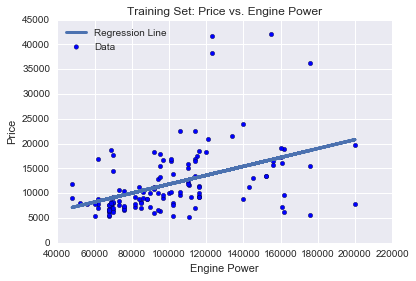

In [494]:
fit_scatter(X_train, y_train, 'Training Set: Price vs. Engine Power')

### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

When we use hold-out validation, we are not using our full data set to train the model. Thus, the model is not necessarily as strong as it could be if we had used the full data set. On small data sets, where we want every bit of information we can get this is especially important. K-fold cross validation can be more accurate although a bit more computationally expensive (although on small data sets this could be negligible!).


### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [495]:
# create KFold with 5 folds
kf = KFold(159, n_folds=5, shuffle=True, random_state=0)
print("Length: {}".format(len(kf)))
print(kf)  

Length: 5
sklearn.cross_validation.KFold(n=159, n_folds=5, shuffle=True, random_state=0)


### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [496]:
i=1 # iterator for knowing which fold we're on

for train, test in kf:
    train_X = X[train, :]; train_Y = y[train] # split training set
    test_X = X[test, :]; test_Y = y[test] # split test set
    print("Fold #{}:\nNumber of Training Points: {} \nNumber of Test Points: {}".format(i, train_X.shape[0], test_X.shape[0]))
    print("Mean Price Training: ${}\n".format(round(train_Y.mean(),2)))
    i = i + 1

Fold #1:
Number of Training Points: 127 
Number of Test Points: 32
Mean Price Training: $11853.27

Fold #2:
Number of Training Points: 127 
Number of Test Points: 32
Mean Price Training: $11635.98

Fold #3:
Number of Training Points: 127 
Number of Test Points: 32
Mean Price Training: $11689.87

Fold #4:
Number of Training Points: 127 
Number of Test Points: 32
Mean Price Training: $11709.83

Fold #5:
Number of Training Points: 128 
Number of Test Points: 31
Mean Price Training: $11535.84



### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [497]:
lm2 = LinearRegression(fit_intercept = True, normalize = True, copy_X = True)
cvp = cross_val_predict(lm2, X, y=y, cv=kf)
print("Shape: {}".format(cvp.shape))
print("Dimensionality Matches: {}".format(cvp.shape == y.shape))

Shape: (159,)
Dimensionality Matches: True


### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [498]:
print('Coefficient of Determination (R^2): {:.3f}'.format(r2_score(y, cvp)))
print('RMSE: {:.3f}'.format(mean_squared_error(y, cvp)**(0.5)))
print('MAE: {:.3f}'.format(mean_absolute_error(y, cvp)))
print('CC: {:.3f}'.format(np.corrcoef(cvp, y)[1,0]))



Coefficient of Determination (R^2): 0.173
RMSE: 6114.452
MAE: 3987.958
CC: 0.417


### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

The MAE measures the average of the deviations between the predicted and the actual values for y while the RMSE normalizes the MSE, giving us a pseudo-average of deviations which helps address whether we had outliers. In this case, our RMSE is approximately 6000 and our MAE was about 4000. This means, our estimates were off by an average of \$4000. Given that price only ranges from about \$5000 to about \$45000 and for the most part it is less than \$15000, this \$4000 average error seems very large. The fact that the RMSE is significantly larger than the MAE tells us that outliers that hurt our performance. The RMSE gives outliers more negative weight (thus being off by 10 is more than 2x worse than being off by 5 twice). 

The CC measures the correlation between engine power and price. The fact that it is positive indicates a positive linear relationship between engine power and price (i.e. as engine power increases, so does price.) The absolute value of CC tells us the degree to which our fit is accurate. A CC of .4, which is less than .5 and thus closer to 0 than to 1, tells us that we have a relatively weak, but not awful fit.


### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

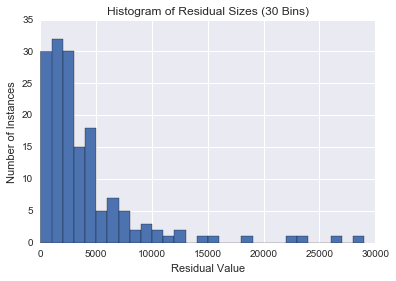

In [499]:
# Your code goes here
residual_data = np.absolute(y - cvp)
bin_width = 1000
residuals_histogram = plt.hist(residual_data, bins=range(int(min(residual_data)), int(max(residual_data)) + bin_width, bin_width))
plt.title('Histogram of Residual Sizes (30 Bins)')
plt.xlabel('Residual Value')
plt.ylabel('Number of Instances')


Yes, this looks somewhat like what I might expect. There are many more smaller residuals and a few instances of data points with huge residuals which represent outliers. It might have helped to preprocess the data.


### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [500]:
# Load the dataset
data_path_base = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path_base, delimiter = ',')

In [501]:
# Create y vector and X nd array 
# Using X2 and y2 so I don't get confused with above variables
y2 = auto_base["price"].copy(deep = True)
X2 = auto_base["engine-power"].copy(deep = True)
X2 = np.array(X2).reshape(n,1)
n = auto_base["price"].count()

In [502]:
# Fit model
lm_base = LinearRegression(fit_intercept = True, normalize = True, copy_X = True)
cvp2 = cross_val_predict(lm_base, X2, y=y2, cv=kf)

In [503]:
# Print Summary Statistics
print('R^2: {:.3f}'.format(r2_score(y2, cvp2)))
print('RMSE: {:.3f}'.format(mean_squared_error(y2, cvp2)**(0.5)))
print('MAE: {:.3f}'.format(mean_absolute_error(y2, cvp2)))
print('CC: {:.3f}'.format(np.corrcoef(cvp2, y2)[1,0]))

R^2: -0.002
RMSE: 6730.844
MAE: 4901.861
CC: -0.062


### ========== Question 1.23 ==========
Show a scatter plot of true vs. predicted prices and another one of engine-power vs. predicted price. Use a single plot with two subplots. Label axes appropriately.

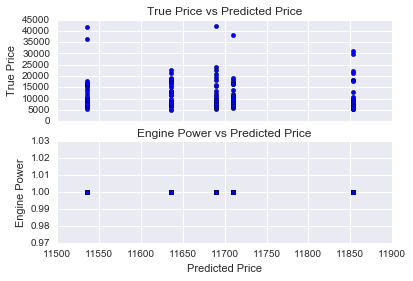

In [504]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].scatter(cvp2, y2)
axarr[0].set_title('True Price vs Predicted Price')
axarr[0].set_ylabel('True Price')
axarr[1].set_title('Engine Power vs Predicted Price')
axarr[1].scatter(cvp2, X2)
axarr[1].set_ylabel('Engine Power')
axarr[1].set_xlabel('Predicted Price')


### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

The simplest possible model would be a flat straight line which always predicts the average price, i.e. the price with the highest prior. That is essentially what happened in this most recent model since all the engine-power values were set to 1. Since it was 5-fold cross validation, there were 5 different average prices but they were all very close to eachother. This means our model always predicts one of those 5 averages. That makes sense given the way we trained it and with this strange dataset, we cannot expect much better performance than that.


### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [505]:
# Your code goes here
auto_base.head(8)

,engine-power,price
0,1.0,13950.0
1,1.0,17450.0
2,1.0,17710.0
3,1.0,23875.0
4,1.0,16430.0
5,1.0,16925.0
6,1.0,20970.0
7,1.0,21105.0


The dataset only has one variable to learn from and that variable tells us absolutely nothing since the values are all 1... Thus, the best regression line a model can come up with is simply to guess price = avg_price every time. For any other value of engine power, this model will be incredibly weak.


## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

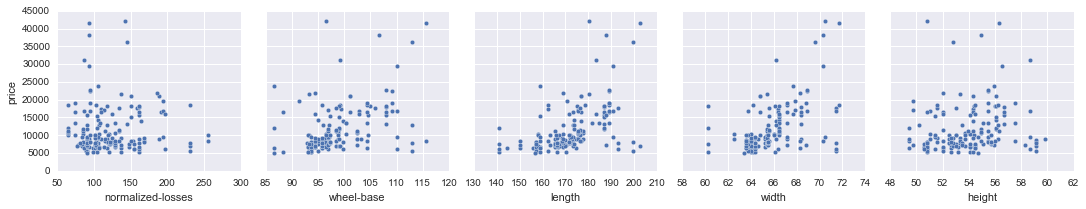

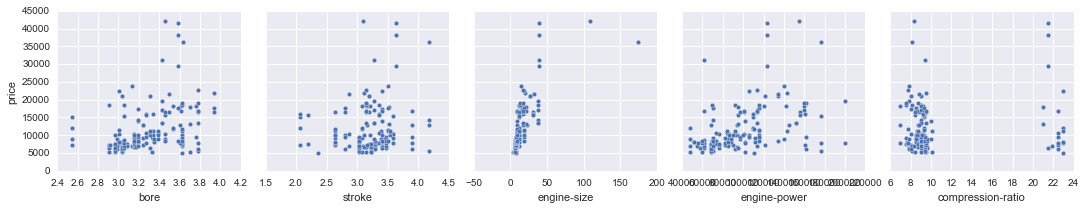

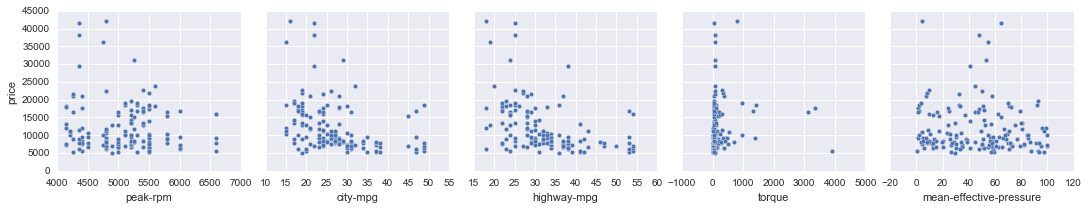

In [506]:
pairplot1 = sns.pairplot(data=auto_numeric, x_vars=['normalized-losses', 'wheel-base', 'length', 'width', 'height'], y_vars = 'price', size=3)
pairplot2 = sns.pairplot(data=auto_numeric, x_vars=['bore', 'stroke', 'engine-size', 'engine-power', 'compression-ratio'], y_vars = 'price', size=3)
pairplot3 = sns.pairplot(data=auto_numeric, x_vars=['peak-rpm', 'city-mpg', 'highway-mpg', 'torque', 'mean-effective-pressure'], y_vars = 'price', size=3)

Many of these seem to have nice correlations but others either seem to be randomly distributed or have even stranger distributions that could not be modeled linearly.

Eye-balling graphs doesn't seem like the most "safe" way to go about choosing which data to drop but a played around with which ones led to the best performance when dropped and decided to drop: 'compression-ratio', 'mean-effective-pressure', 'normalized-losses', 'torque', 'city-mpg', and 'wheel-base'


### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [507]:
# Your code goes here
X_m = auto_numeric.copy(deep = True)
y_m = auto_numeric['price']
X_m.drop(['compression-ratio', 'mean-effective-pressure', 'normalized-losses', 'torque', 'price'], axis = 1, inplace = True)
X_m.drop(['city-mpg', 'wheel-base'], axis = 1, inplace = True)


lm_m = LinearRegression(fit_intercept = True, normalize = True, copy_X = True)
cvp_m = cross_val_predict(lm_m, X_m, y=y_m, cv=kf)

### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [508]:
# Print Summary Statistics
print('R^2: {:.3f}'.format(r2_score(y_m, cvp_m)))
print('RMSE: {:.3f}'.format(mean_squared_error(y_m, cvp_m)**(0.5)))
print('MAE: {:.3f}'.format(mean_absolute_error(y_m, cvp_m)))
print('CC: {:.3f}'.format(np.corrcoef(cvp_m, y_m)[1,0]))

R^2: 0.491
RMSE: 4799.008
MAE: 3008.449
CC: 0.741


### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

In this case, we perform better on every single metric. The correlation coefficient jumps from .417 to .741 and the coefficient of determination jumps from .173 to .491! Since this is multidimensional, it is much more accurate in prediction.

### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

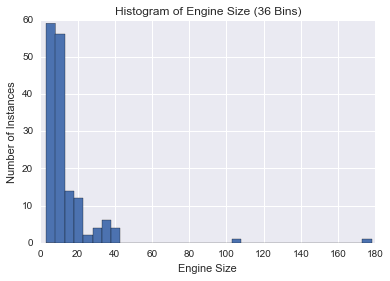

In [509]:
# Your code goes here
engine_size = auto_numeric['engine-size']
bin_width = 5
residuals_histogram = plt.hist(engine_size, bins=range(int(min(engine_size)), int(max(engine_size)) + bin_width, bin_width))
plt.title('Histogram of Engine Size (36 Bins)')
plt.xlabel('Engine Size')
plt.ylabel('Number of Instances')

### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

Yes, it might cause a problem. The data is very skewed so we could use a log transform.


### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

In [510]:
auto_numeric['engine-size'] = np.log(auto_numeric['engine-size'])

### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [511]:
# Your code goes here
X_m = auto_numeric.copy(deep = True)
y_m = auto_numeric['price']
X_m.drop(['compression-ratio', 'mean-effective-pressure', 'normalized-losses', 'torque', 'price'], axis = 1, inplace = True)
X_m.drop(['city-mpg', 'wheel-base'], axis = 1, inplace = True)


lm_m = LinearRegression(fit_intercept = True, normalize = True, copy_X = True)
cvp_m = cross_val_predict(lm_m, X_m, y=y_m, cv=kf)
# Print Summary Statistics
print('R^2: {:.3f}'.format(r2_score(y_m, cvp_m)))
print('RMSE: {:.3f}'.format(mean_squared_error(y_m, cvp_m)**(0.5)))
print('MAE: {:.3f}'.format(mean_absolute_error(y_m, cvp_m)))
print('CC: {:.3f}'.format(np.corrcoef(cvp_m, y_m)[1,0]))

R^2: 0.684
RMSE: 3778.927
MAE: 2629.489
CC: 0.828


### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

Yes! Performance got much better according to every metric! RMSE made an especially big jump down which means we killed some of the especially badly skewed data.


### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [512]:
pd.set_option('max_columns', 30)

In [513]:
# Load the dataset
data_path_base = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path_base, delimiter = ',')

auto_full.head(20)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

Categorical Variables: make, fuel-type, aspiration, body-style, drive-wheels, engine-location, engine-type, and fuel-system.

In order to fit a model, all of the data needs to be numeric. However, we can easily transform/encode the nominal data into numeric data.

### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [514]:
auto_full_edit = auto_full.copy(deep = True)
y = auto_full_edit['price']
auto_full_edit.drop(['price'], axis = 1, inplace = True)
encoding_dictionary = dict()

auto_full_d = auto_full_edit.drop(['normalized-losses', 'num-of-doors', 'wheel-base', 'length','width','height'], axis = 1, inplace = False)
auto_full_d.drop(['num-of-cylinders','engine-size','bore','stroke', 'mean-effective-pressure', 'torque'], axis = 1, inplace = True)
auto_full_d.drop(['compression-ratio', 'engine-power','peak-rpm','city-mpg','highway-mpg'], axis = 1, inplace = True)

# Loop over attributes by excluding the ones that are continuous and the target variable
for column in auto_full_d:  
    le = LabelEncoder().fit(auto_full_edit[column]) # Initialise the LabelEncoder and fit
    auto_full_edit[column] = le.transform(auto_full_edit[column]) # Transform data and save in credit_clean DataFrame
    encoding_dictionary[column] = le # Store the LabelEncoder in dictionary
    
encoder = OneHotEncoder(categorical_features = [1,2,3,5,6,7])
encoder.fit(auto_full_edit)
X_enc = encoder.transform(auto_full_edit).toarray()
print("X_enc Dimensionality: {}".format(X_enc.shape))

X_enc Dimensionality: (159, 51)


### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [515]:
lm_m2 = LinearRegression(fit_intercept = True, normalize = True, copy_X = True)
cvp_m2 = cross_val_predict(lm_m2, X_enc, y=y, cv=kf)
# Print Summary Statistics
print('R^2: {:.3f}'.format(r2_score(y, cvp_m2)))
print('RMSE: {:.3f}'.format(mean_squared_error(y, cvp_m2)**(0.5)))
print('MAE: {:.3f}'.format(mean_absolute_error(y, cvp_m2)))
print('CC: {:.3f}'.format(np.corrcoef(cvp_m2, y)[1,0]))

R^2: 0.842
RMSE: 2670.201
MAE: 1862.359
CC: 0.922


### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

This model performs better than my models in 2.3/2.8 according to every metric. The CC and R^2 values are both very close to 1. The main advantage of the old models is that they are more computationally simple and don't require encoding any categorical data, although that process does not seem very expensive computationally, at least in this case.

The advantage of this method is that it is highly accurate in regression.

### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. You should still make use of the transformations applied in 2.8. Has your performance improved? Explain your answer in 1-2 sentences.

In [516]:
rf = RandomForestRegressor()
cvp_m3 = cross_val_predict(rf, X_enc, y=y, cv=kf)
# Print Summary Statistics
print('Random Forest:')
print('R^2: {:.3f}'.format(r2_score(y, cvp_m3)))
print('RMSE: {:.3f}'.format(mean_squared_error(y, cvp_m3)**(0.5)))
print('MAE: {:.3f}'.format(mean_absolute_error(y, cvp_m3)))
print('CC: {:.3f}'.format(np.corrcoef(cvp_m3, y)[1,0]))

dt = DecisionTreeRegressor()
cvp_m3 = cross_val_predict(dt, X_enc, y=y, cv=kf)
# Print Summary Statistics
print('\nDecision Tree:')
print('R^2: {:.3f}'.format(r2_score(y, cvp_m3)))
print('RMSE: {:.3f}'.format(mean_squared_error(y, cvp_m3)**(0.5)))
print('MAE: {:.3f}'.format(mean_absolute_error(y, cvp_m3)))
print('CC: {:.3f}'.format(np.corrcoef(cvp_m3, y)[1,0]))

Random Forest:
R^2: 0.845
RMSE: 2647.520
MAE: 1808.714
CC: 0.922

Decision Tree:
R^2: 0.773
RMSE: 3204.248
MAE: 2214.616
CC: 0.889


The random forest had the lowest MAE but it also had a lower R^2/CC and a higher RMSE than our best linear regressor. This means it struggled more with outliers.

The decision tree classifier did not perform very well as it performed worse on every metric to our linear regressor.